# Importing pandas and playground dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
play.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


In [2]:
play["neighborhood"].describe()

count                     440
unique                     67
top       Squirrel Hill South
freq                       32
Name: neighborhood, dtype: object

# Pivoting Data

In [3]:
##neighborhood=play.groupby("neighborhood").count()
neighborhood=play['neighborhood'].value_counts().sort_values(ascending=False)
neighborhood


Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
East Carnegie           2
Central Oakland         2
Bluff                   2
Strip District          1
West Oakland            1
Name: neighborhood, Length: 67, dtype: int64

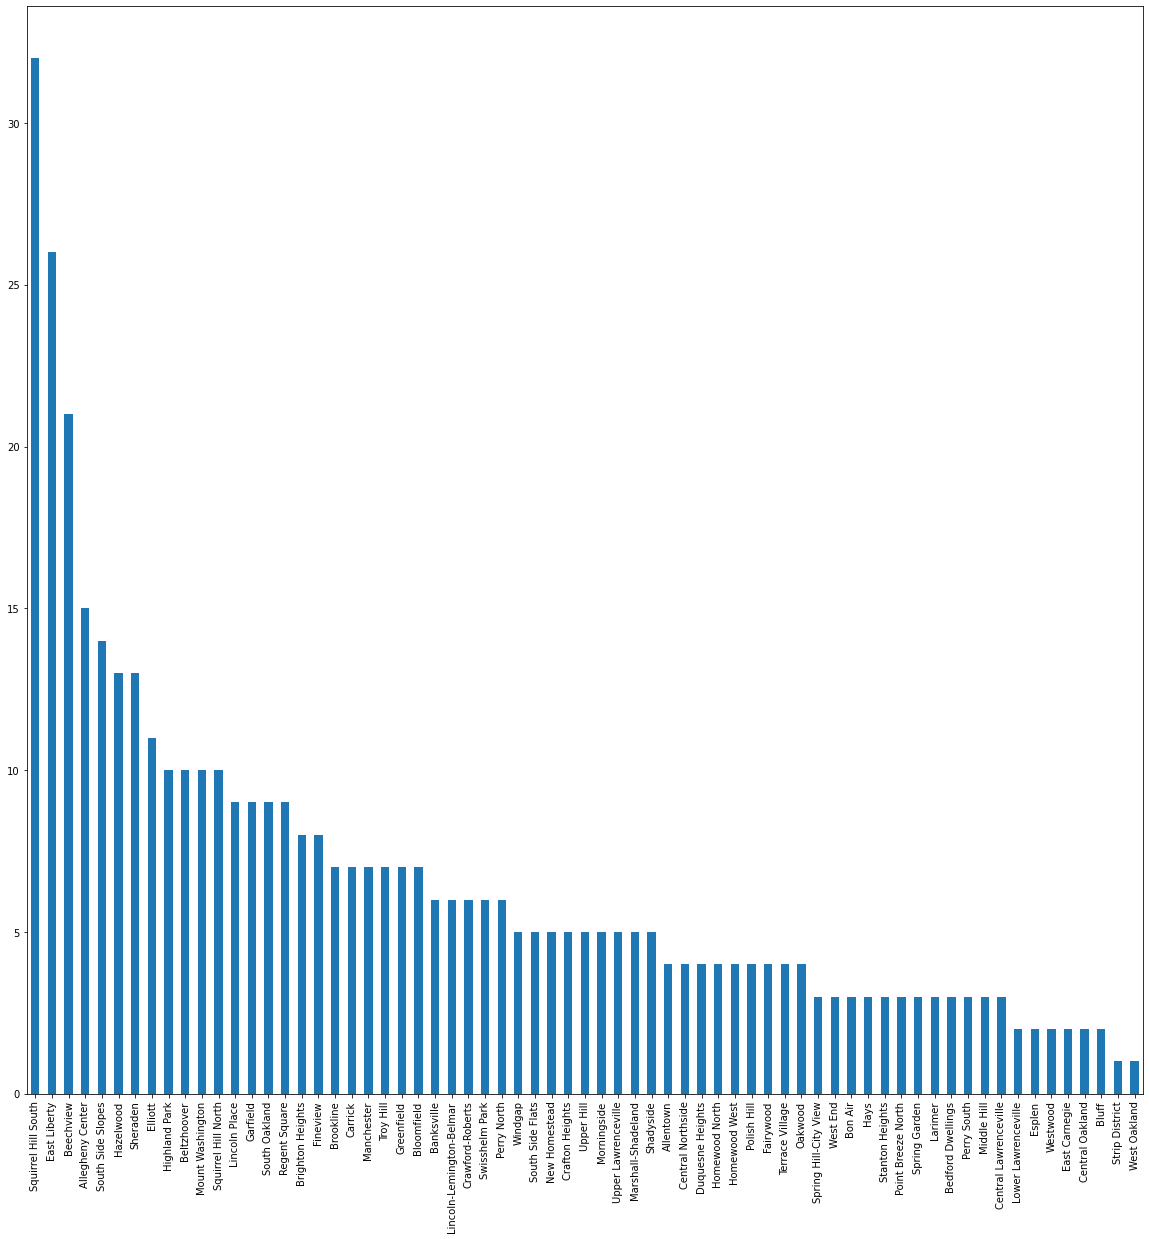

In [4]:
neighborhood.plot.bar(figsize=(20,20))


# Testing for ADA approved

In [5]:
mask=play['ada_accessible']=='t'
ada=play[mask]
graph=ada['neighborhood'].value_counts().sort_values(ascending=False)



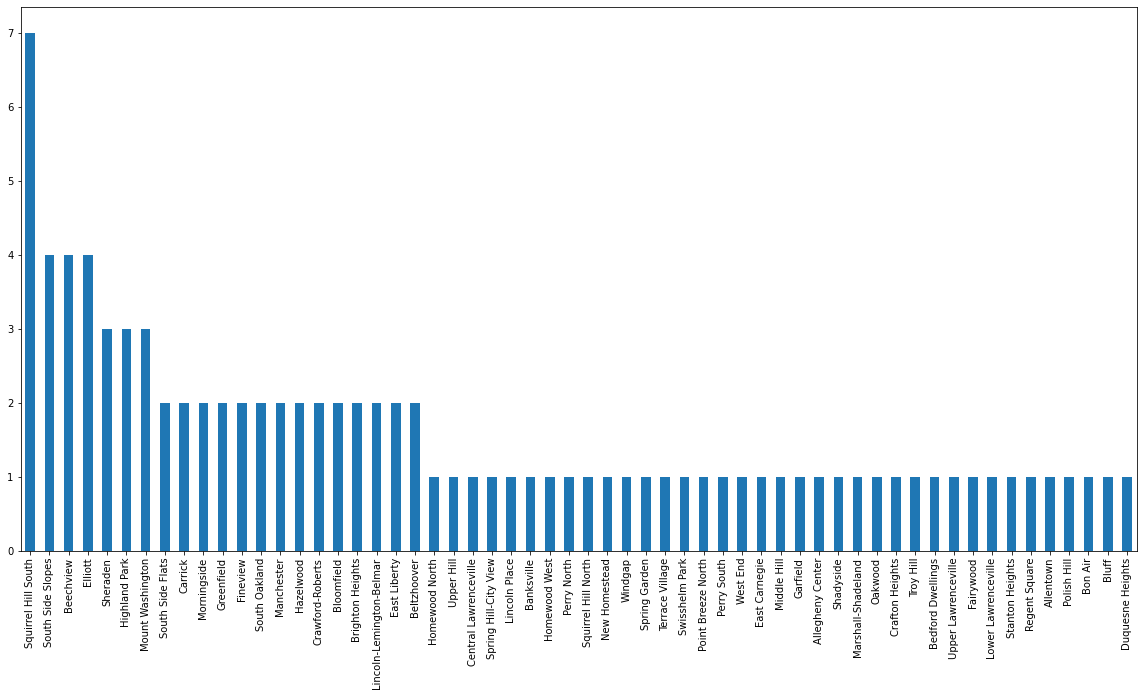

In [6]:
graph.plot.bar(figsize=(20,10))

# Formatting Bar graphs

Text(0.5, 0, 'Neighborhood')

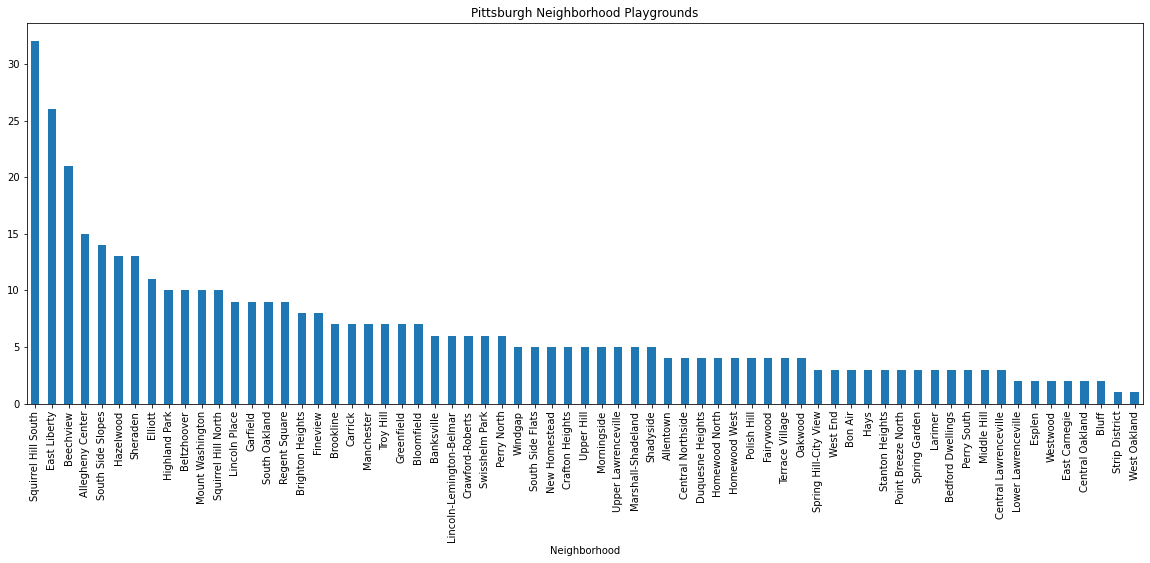

In [7]:
neighborhood.plot.bar(figsize=(20,7))

plt.title("Pittsburgh Neighborhood Playgrounds")
plt.xlabel('Neighborhood')


Text(0.5, 0, 'Neighborhood')

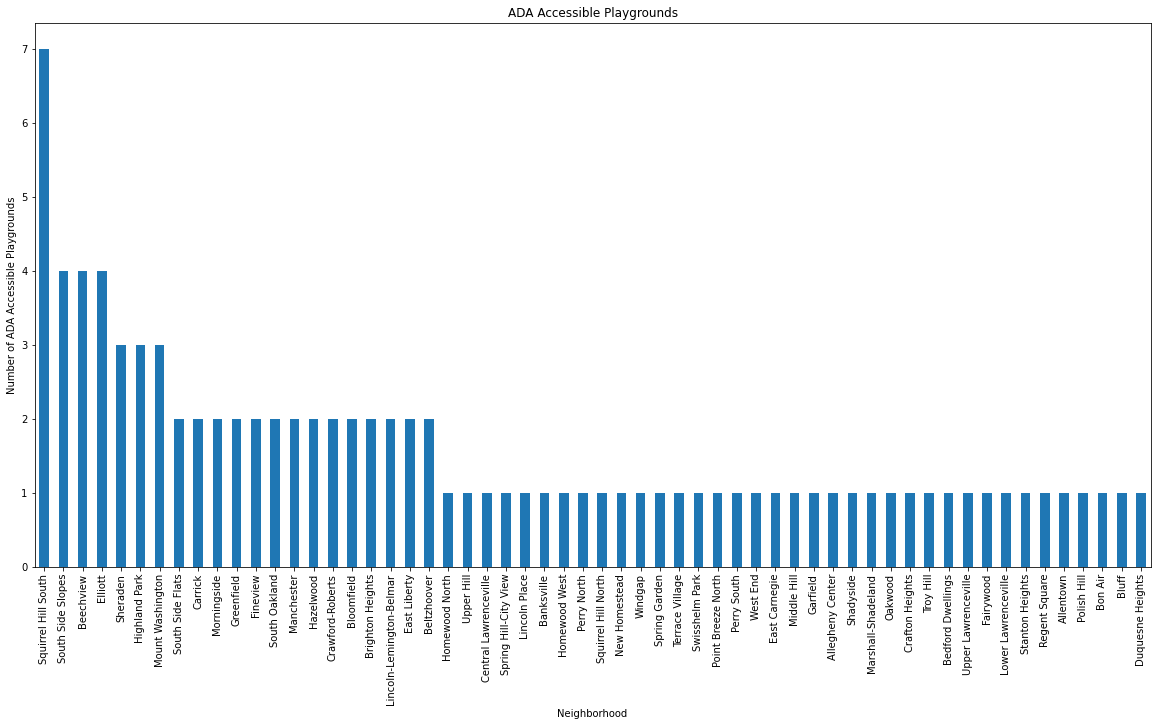

In [8]:
graph.plot.bar(figsize=(20,10))
plt.title("ADA Accessible Playgrounds")
plt.ylabel("Number of ADA Accessible Playgrounds")
plt.xlabel("Neighborhood")

# Creating other graphs (Mainly a Choropleth Map)

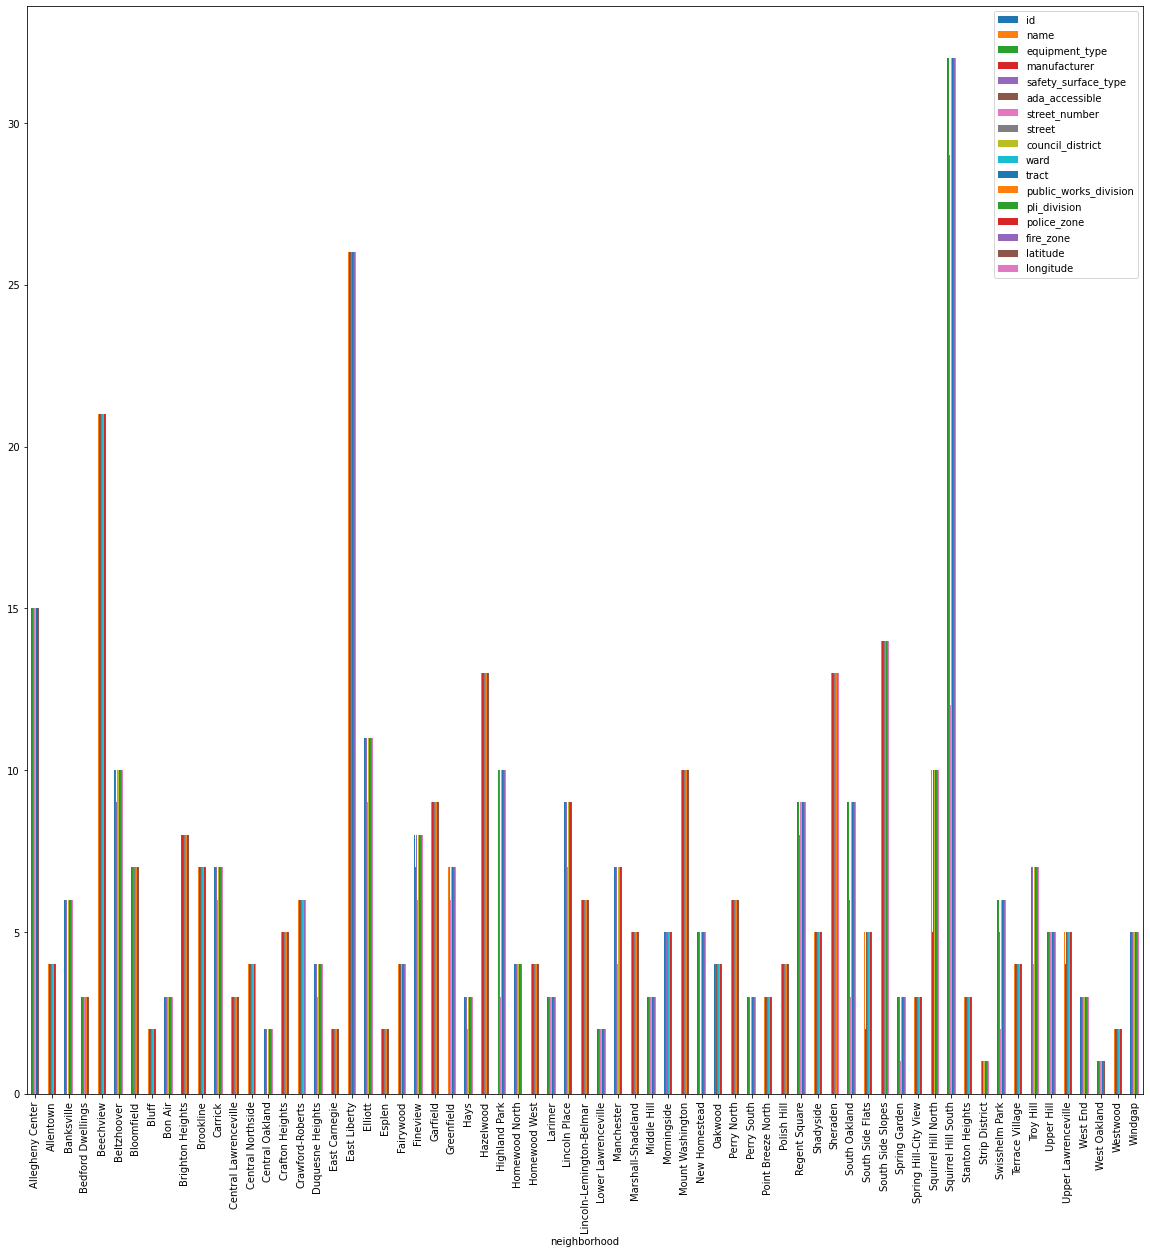

In [9]:
neighbor=play.groupby('neighborhood').count()
neighbor.plot.bar(figsize=(20,20))

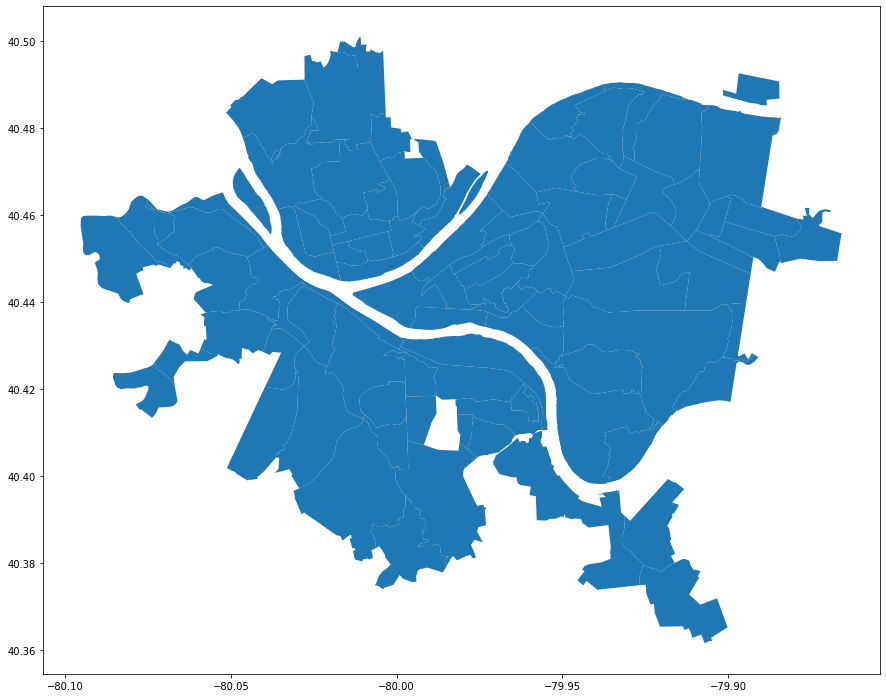

In [2]:
import geopandas as geo
hood=geo.read_file("Neighborhoods/Neighborhoods_.shp")
hood.plot(figsize=(15,15))


In [11]:
play_map = hood.merge(neighbor, how='left', left_on='hood', right_on='neighborhood')
play_map[['hood','ada_accessible','geometry']]


,hood,ada_accessible,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,6.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,3.0,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


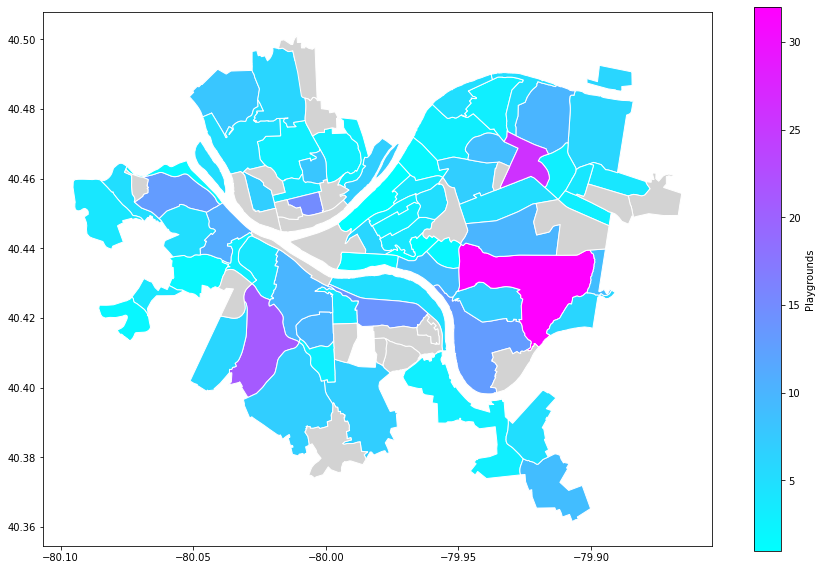

In [12]:
play_map.plot(column='ada_accessible',
             cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

# Creating a Rating System for the Playground Dataset

neighborhood    32
dtype: int64


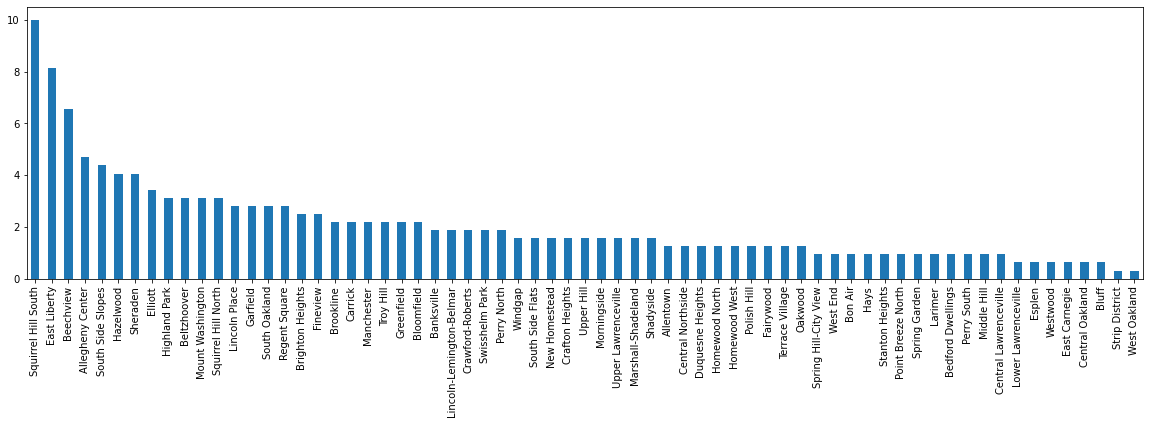

In [13]:
rate=pd.DataFrame(neighborhood)
highest=rate.max()
print(highest)
rate["Rating"]=((rate['neighborhood']/32)*10)
rate['Rating'].plot.bar(figsize=(20,5))

# Messing with Other Data and Merging

In [6]:
signs=pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")
play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
public_art_data = pd.read_csv("public-art.csv", index_col="id")

neighborhood=play['neighborhood'].value_counts().sort_values(ascending=False).reset_index()


neighbor=signs['neighborhood'].value_counts().sort_values(ascending=False).reset_index()


neighborhoods = public_art_data['neighborhood'].value_counts().sort_values(ascending=False).reset_index()


In [7]:
play_rate=pd.DataFrame(neighborhood)

play_rate["Playground Rating"]=((play_rate['neighborhood']/32)*10)

sign_rate=pd.DataFrame(neighbor)
sign_rate["Traffic Sign Rating"]=((sign_rate['neighborhood']/3387)*10)

art_rate=pd.DataFrame(neighborhoods)

art_rate["Public Art Rating"]=((art_rate['neighborhood']/27)*10)

sign_rate

,index,neighborhood,Traffic Sign Rating
0,Bloomfield,3387,10.000000
1,South Side Flats,3230,9.536463
2,Squirrel Hill South,3191,9.421317
3,Shadyside,3046,8.993209
4,Central Business District,2669,7.880130
...,...,...,...
86,Chartiers City,38,0.112194
87,St. Clair,32,0.094479
88,Glen Hazel,26,0.076764
89,Mount Oliver Borough,16,0.047239


In [8]:
metric=play_rate.merge(art_rate, on='index')
final_metric=metric.merge(signs_rate, on='index')

final_metric

,index,neighborhood_x,Playground Rating,neighborhood_y,Public Art Rating,neighborhood,Traffic Sign Rating
0,Squirrel Hill South,32,10.0000,22,8.148148,3191,9.421317
1,East Liberty,26,8.1250,1,0.370370,1712,5.054621
2,Beechview,21,6.5625,5,1.851852,1328,3.920874
3,Allegheny Center,15,4.6875,18,6.666667,580,1.712430
4,South Side Slopes,14,4.3750,3,1.111111,938,2.769412
5,Hazelwood,13,4.0625,4,1.481481,1203,3.551816
6,Sheraden,13,4.0625,1,0.370370,845,2.494833
7,Elliott,11,3.4375,2,0.740741,532,1.570712
8,Highland Park,10,3.1250,10,3.703704,1468,4.334219
9,Mount Washington,10,3.1250,2,0.740741,1545,4.561559


In [9]:
drop=final_metric.drop(columns=['neighborhood_x','neighborhood_y','neighborhood'])
av_rate=0
averages=pd.DataFrame(drop)
averages['Average Rating']=""
row=0
for i in drop['index']:
    av_rate=(drop.loc[row,'Playground Rating']+drop.loc[row,'Traffic Sign Rating']+drop.loc[row,'Public Art Rating'])/3
    averages.at[row,'Average Rating']=av_rate
    av_rate=0
    row=row+1
drop

,index,Playground Rating,Public Art Rating,Traffic Sign Rating,Average Rating
0,Squirrel Hill South,10.0000,8.148148,9.421317,9.18982
1,East Liberty,8.1250,0.370370,5.054621,4.51666
2,Beechview,6.5625,1.851852,3.920874,4.11174
3,Allegheny Center,4.6875,6.666667,1.712430,4.35553
4,South Side Slopes,4.3750,1.111111,2.769412,2.75184
5,Hazelwood,4.0625,1.481481,3.551816,3.03193
6,Sheraden,4.0625,0.370370,2.494833,2.30923
7,Elliott,3.4375,0.740741,1.570712,1.91632
8,Highland Park,3.1250,3.703704,4.334219,3.72097
9,Mount Washington,3.1250,0.740741,4.561559,2.8091


In [10]:
averages['Average Rating'].sort_values(ascending=False)
averages.set_index('index')

,Playground Rating,Public Art Rating,Traffic Sign Rating,Average Rating
index,,,,
Squirrel Hill South,10.0000,8.148148,9.421317,9.18982
East Liberty,8.1250,0.370370,5.054621,4.51666
Beechview,6.5625,1.851852,3.920874,4.11174
Allegheny Center,4.6875,6.666667,1.712430,4.35553
South Side Slopes,4.3750,1.111111,2.769412,2.75184
Hazelwood,4.0625,1.481481,3.551816,3.03193
Sheraden,4.0625,0.370370,2.494833,2.30923
Elliott,3.4375,0.740741,1.570712,1.91632
Highland Park,3.1250,3.703704,4.334219,3.72097


In [77]:
final_map = hood.merge(averages, how='left', left_on='hood', right_on='index')
i=0

for row in final_map['hood']:
    if math.isnan(final_map.loc[i,'Average Rating']):
        final_map.fillna(value=0,axis=1,inplace=True)
    i=i+1
final_map.plot(column='Average Rating',
            cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )
final_map[['hood','Average Rating','geometry']]

/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:373: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

# Analysis and Conclusion

Based on what I've found in this notebook, Squirrel Hill South has the most playgrounds out of all the neighborhoods in Pittsburgh. However, this is only based off of the actual amount of playgrounds. If I had looked into other factors such as the manufacturer or the type of equipment, it is possible that I would have reached a different conclusion. From the data we can see the Squirrel Hill South beats out all the other neighborhoods, but I also find it interesting that many of the other neighborhoods have the same number of playgrounds. In the first bar graph, we can see that the neighborhoods are sort of in groups in terms of how many playgrounds there are. There seem to be more neighborhoods with a lower amount of playgrounds, but as the number of playgrounds increases, the amount of neighborhoods that have the same number of playgrounds decreases. This makes sense because I feel like it is more common for a neighborhood to only have a few playgrounds unlike Squirrel Hill South which is an outlier with 32 playgrounds. As you can see, I did looked at which neighborhoods had the most ADA accessible playgrounds just to see if this would yeild a differnt outcome. Squirrel Hill South still remained on top, and I decided not to include this bit in the final presentation because I felt that it would take away from the other metrics as well as the combined metric. I would also like to talk a bit about the cholorpleth map. I expected neighborhoods around each other to have similar shades. I mean that I expceted the neighborhoods with higher amounts of playgrounds to be closer to eachother. However, according to the map, the neighborhoods with high numbers of playgroundsa are spread out across Pittsburgh. Maybe because these neighborhoods have a high number of playgrounds, the surrounding neighborhoods did not feel the need to have a bunch of playgrounds. An additional note that I would like to add is that I find it interesting that the rating bar graph follows the same shape as the original bar graph. Of course this makes sense, but for some reason I was just not expecting it. Over all, I am very happy with the data that I have chosen and with the neighborhood that ended up on top. 